In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train.set_index('PassengerId', inplace=True)
test.set_index('PassengerId', inplace=True)

In [5]:
train.shape, test.shape

((891, 11), (418, 10))

In [6]:
data = pd.concat([train,test], sort=True)

In [7]:
data.columns = ['Idade', 'Cabine', 'Embarque', 'Tarifa', 'Nome', 'PaisFilhos', 'Classe', 'Sexo',
       'IrmaoConjuge', 'Sobreviveu', 'Tiquete']

In [8]:
data.columns

Index(['Idade', 'Cabine', 'Embarque', 'Tarifa', 'Nome', 'PaisFilhos', 'Classe',
       'Sexo', 'IrmaoConjuge', 'Sobreviveu', 'Tiquete'],
      dtype='object')

In [9]:
data['Sexo'].replace({'male': 0, 'female': 1}, inplace=True)

In [10]:
data

,Idade,Cabine,Embarque,Tarifa,Nome,PaisFilhos,Classe,Sexo,IrmaoConjuge,Sobreviveu,Tiquete
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,0,1,0.0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,1,1,1.0,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,1,0,1.0,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,1,1,1.0,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,0,0,0.0,373450
...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,3,0,0,NaN,A.5. 3236
1306,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1,1,0,NaN,PC 17758
1307,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,3,0,0,NaN,SOTON/O.Q. 3101262


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Idade         1046 non-null   float64
 1   Cabine        295 non-null    object 
 2   Embarque      1307 non-null   object 
 3   Tarifa        1308 non-null   float64
 4   Nome          1309 non-null   object 
 5   PaisFilhos    1309 non-null   int64  
 6   Classe        1309 non-null   int64  
 7   Sexo          1309 non-null   int64  
 8   IrmaoConjuge  1309 non-null   int64  
 9   Sobreviveu    891 non-null    float64
 10  Tiquete       1309 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 122.7+ KB


In [12]:
data.isnull().sum()

Idade            263
Cabine          1014
Embarque           2
Tarifa             1
Nome               0
PaisFilhos         0
Classe             0
Sexo               0
IrmaoConjuge       0
Sobreviveu       418
Tiquete            0
dtype: int64

In [13]:
data['Embarque'].fillna('S', inplace=True)

In [14]:
data.isnull().sum()

Idade            263
Cabine          1014
Embarque           0
Tarifa             1
Nome               0
PaisFilhos         0
Classe             0
Sexo               0
IrmaoConjuge       0
Sobreviveu       418
Tiquete            0
dtype: int64

In [15]:
data.describe()

,Idade,Tarifa,PaisFilhos,Classe,Sexo,IrmaoConjuge,Sobreviveu
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,2.294882,0.355997,0.498854,0.383838
std,14.413493,51.758668,0.865560,0.837836,0.478997,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,2.000000,0.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,3.000000,1.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,3.000000,1.000000,8.000000,1.000000


In [16]:
data.describe(include=['O'])

,Cabine,Embarque,Nome,Tiquete
count,295,1309,1309,1309
unique,186,3,1307,929
top,C23 C25 C27,S,"Kelly, Mr. James",CA. 2343
freq,6,916,2,11


In [17]:
len(data) #quantos dados temos no dataframe

1309

In [18]:
len(train)/2224 #proporção da amostra em relação a população total

0.4006294964028777

In [19]:
1-(1502/2224) #proporção de sobreviventes

0.32464028776978415

In [20]:
len(train.loc[train['Survived']==1]['Survived'])/len(train) #proporção de sobreviventes do dataset de treino

0.3838383838383838

In [21]:
data.groupby('Classe').mean()['Sobreviveu']

Classe
1    0.629630
2    0.472826
3    0.242363
Name: Sobreviveu, dtype: float64

In [22]:
data.groupby('Sexo').mean()['Sobreviveu']

Sexo
0    0.188908
1    0.742038
Name: Sobreviveu, dtype: float64

In [23]:
data.groupby('IrmaoConjuge').mean()['Sobreviveu'].sort_values(ascending=False)

IrmaoConjuge
1    0.535885
2    0.464286
0    0.345395
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Sobreviveu, dtype: float64

In [24]:
data.groupby('PaisFilhos').mean()['Sobreviveu'].sort_values(ascending=False)

PaisFilhos
3    0.600000
1    0.550847
2    0.500000
0    0.343658
5    0.200000
4    0.000000
6    0.000000
9         NaN
Name: Sobreviveu, dtype: float64

In [25]:
data[['IrmaoConjuge','PaisFilhos']].corr()

,IrmaoConjuge,PaisFilhos
IrmaoConjuge,1.000000,0.373587
PaisFilhos,0.373587,1.000000


<AxesSubplot:xlabel='Sobreviveu', ylabel='count'>

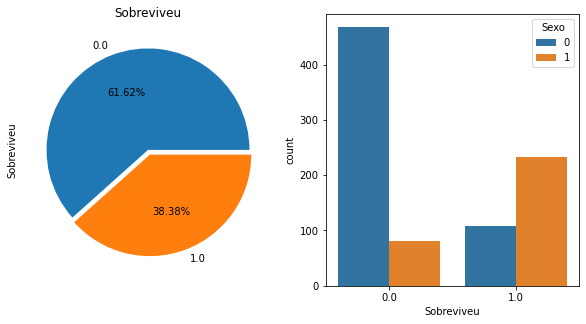

In [26]:
f, ax = plt.subplots(1,2,figsize=(10,5))
data['Sobreviveu'].value_counts().plot.pie(explode=[0,0.05],autopct='%0.2f%%',ax=ax[0])
ax[0].set_title('Sobreviveu')
sns.countplot(x='Sobreviveu',data=data, ax=ax[1], hue='Sexo')

In [27]:
data.groupby(['Sexo','Sobreviveu']).count()['Nome']

Sexo  Sobreviveu
0     0.0           468
      1.0           109
1     0.0            81
      1.0           233
Name: Nome, dtype: int64

<AxesSubplot:xlabel='Idade', ylabel='Count'>

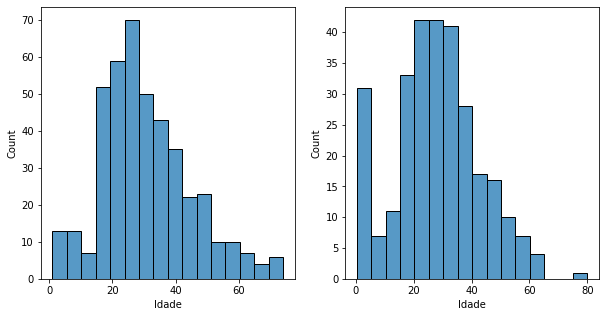

In [28]:
f, ax = plt.subplots(1,2,figsize=(10,5))
sns.histplot(x='Idade', data=data.loc[data['Sobreviveu']==0],ax=ax[0])
sns.histplot(x='Idade', data=data.loc[data['Sobreviveu']==1],ax=ax[1])

In [29]:
data.drop('Cabine',inplace=True,axis=1)

In [30]:
data['Titulo'] = data['Nome'].str.extract('([a-zA-Z]+)\.')

In [31]:
data['Titulo'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [32]:
data['Titulo'] = data['Titulo'].apply(lambda x: 'Outros' if x not in ['Mr','Mrs','Miss','Master'] else x)

In [33]:
data['Titulo'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Outros'], dtype=object)

In [34]:
titulos_traduzidos = {'Mr': 'HomemAdulto',
                     'Mrs': 'Casada',
                     'Master': 'Menino',
                     'Miss': 'Solteira',
                     'Outros': 'Outros'}

In [35]:
data['Titulo'].replace(titulos_traduzidos, inplace=True)

In [36]:
data['Titulo'].unique()

array(['HomemAdulto', 'Casada', 'Solteira', 'Menino', 'Outros'],
      dtype=object)

In [37]:
data['Sobrenome'] = data['Nome'].str.split(',').str[0]

In [38]:
data.groupby('Sobrenome')['Nome'].count().sort_values(ascending=False)

Sobrenome
Andersson         11
Sage              11
Goodwin            8
Asplund            8
Davies             7
                  ..
Humblen            1
Hunt               1
Hyman              1
Ibrahim Shawah     1
van Melkebeke      1
Name: Nome, Length: 875, dtype: int64

In [39]:
data[['Nome','Idade','Titulo','Tiquete','Sobreviveu']].loc[data['Sobrenome']=='Andersson']

,Nome,Idade,Titulo,Tiquete,Sobreviveu
PassengerId,,,,,
14,"Andersson, Mr. Anders Johan",39.0,HomemAdulto,347082,0.0
69,"Andersson, Miss. Erna Alexandra",17.0,Solteira,3101281,1.0
120,"Andersson, Miss. Ellis Anna Maria",2.0,Solteira,347082,0.0
147,"Andersson, Mr. August Edvard (""Wennerstrom"")",27.0,HomemAdulto,350043,1.0
542,"Andersson, Miss. Ingeborg Constanzia",9.0,Solteira,347082,0.0
543,"Andersson, Miss. Sigrid Elisabeth",11.0,Solteira,347082,0.0
611,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",39.0,Casada,347082,0.0
814,"Andersson, Miss. Ebba Iris Alfrida",6.0,Solteira,347082,0.0
851,"Andersson, Master. Sigvard Harald Elias",4.0,Menino,347082,0.0


In [40]:
mulher_ou_crianca = data.loc[(data['Sexo']==1) | (data['Titulo']=='Menino')]

In [41]:
mulher_ou_crianca

,Idade,Embarque,Tarifa,Nome,PaisFilhos,Classe,Sexo,IrmaoConjuge,Sobreviveu,Tiquete,Titulo,Sobrenome
PassengerId,,,,,,,,,,,,
2,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,1,1,1.0,PC 17599,Casada,Cumings
3,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,1,0,1.0,STON/O2. 3101282,Solteira,Heikkinen
4,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,1,1,1.0,113803,Casada,Futrelle
8,2.0,S,21.0750,"Palsson, Master. Gosta Leonard",1,3,0,3,0.0,349909,Menino,Palsson
9,27.0,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3,1,0,1.0,347742,Casada,Johnson
...,...,...,...,...,...,...,...,...,...,...,...,...
1302,NaN,Q,7.7500,"Naughton, Miss. Hannah",0,3,1,0,NaN,365237,Solteira,Naughton
1303,37.0,Q,90.0000,"Minahan, Mrs. William Edward (Lillian E Thorpe)",0,1,1,1,NaN,19928,Casada,Minahan
1304,28.0,S,7.7750,"Henriksson, Miss. Jenny Lovisa",0,3,1,0,NaN,347086,Solteira,Henriksson


In [42]:
mulher_ou_crianca['Titulo'].unique()

array(['Casada', 'Solteira', 'Menino', 'Outros'], dtype=object)

In [43]:
mulher_ou_crianca.loc[mulher_ou_crianca['Sobrenome']=='Brown']['Sobreviveu'].count()

3

In [44]:
data['Tamanho'] = data['Sobrenome'].apply(lambda x: mulher_ou_crianca.loc[mulher_ou_crianca['Sobrenome']==x]['Sobreviveu'].count())

In [45]:
data[['Tamanho','Sobrenome','Titulo']].sort_values(by='Tamanho', ascending=False)

,Tamanho,Sobrenome,Titulo
PassengerId,,,
1212,7,Andersson,HomemAdulto
69,7,Andersson,Solteira
611,7,Andersson,Casada
120,7,Andersson,Solteira
147,7,Andersson,HomemAdulto
...,...,...,...
772,0,Jensen,HomemAdulto
774,0,Elias,HomemAdulto
235,0,Leyson,HomemAdulto


In [46]:
for idx, _ in data.iterrows():
    if data['Titulo'].at[idx] == 'HomemAdulto':
        data['Tamanho'].at[idx] = 0

In [47]:
data.loc[data['Titulo']=='HomemAdulto']['Tamanho'].unique()

array([0], dtype=int64)

In [48]:
data[['Titulo','Sobreviveu']].loc[data['Sobrenome']=='Andersson'].loc[(data['Sexo']==1) | (data['Titulo']=='Menino')].mean()['Sobreviveu']

0.14285714285714285

In [49]:
data['SobrevivenciaGrupo'] = data['Sobrenome'].apply(lambda x: data[['Titulo','Sobreviveu']].loc[data['Sobrenome']==x].loc[(data['Sexo']==1) | (data['Titulo']=='Menino')].mean()['Sobreviveu'])

In [50]:
data[['SobrevivenciaGrupo','Titulo']]

,SobrevivenciaGrupo,Titulo
PassengerId,,
1,NaN,HomemAdulto
2,1.0,Casada
3,1.0,Solteira
4,1.0,Casada
5,1.0,HomemAdulto
...,...,...
1305,NaN,HomemAdulto
1306,NaN,Outros
1307,NaN,HomemAdulto


In [51]:
for idx, _ in data.iterrows():
    if data['Titulo'].at[idx] == 'HomemAdulto':
        data['SobrevivenciaGrupo'].at[idx] = 0

In [52]:
data[['SobrevivenciaGrupo','Titulo']].isnull().sum()

SobrevivenciaGrupo    119
Titulo                  0
dtype: int64

In [53]:
data['SobrevivenciaGrupo'].fillna(0, inplace=True)

In [54]:
data[['SobrevivenciaGrupo','Titulo']].isnull().sum()

SobrevivenciaGrupo    0
Titulo                0
dtype: int64

In [55]:
data[['Sobrenome','Titulo']].loc[(data['SobrevivenciaGrupo']==0) & (data['Tamanho']>1)]\
.loc[(data['Sexo']==1) | (data['Titulo']=='Menino')]['Sobrenome'].unique()

array(['Palsson', 'Rice', 'Vander Planke', 'Panula', 'Goodwin', 'Skoog',
       'Zabour', 'Jussila', 'Boulos', 'Ford', 'Sage', 'Lefebre', 'Strom',
       'Barbara', 'Van Impe', 'Bourke'], dtype=object)

In [56]:
data[['Sobrenome','Titulo','Sobreviveu']].loc[(data['SobrevivenciaGrupo']==0) & (data['Tamanho']>1)]\
.loc[(data['Sexo']==1) | (data['Titulo']=='Menino')]['Sobreviveu'].count()

50

In [57]:
data[['Sobrenome','Titulo']].loc[(data['SobrevivenciaGrupo']==1) & (data['Tamanho']>1)]\
.loc[(data['Sexo']==1) | (data['Titulo']=='Menino')]['Sobrenome'].unique()

array(['Johnson', 'Sandstrom', 'Nicola-Yarred', 'Laroche', 'Harper',
       'West', 'Moubarek', 'Caldwell', 'Fortune', 'Doling', 'Peter',
       'Goldsmith', 'Becker', 'Navratil', 'Brown', 'Newell', 'Collyer',
       'Murphy', 'Hamalainen', 'Graham', 'Mellinger', 'Kelly', 'Hays',
       'Ryerson', 'Wick', 'Hippach', 'Coutts', 'Richards', 'Hart',
       'Baclini', 'Quick', 'Taussig', 'Herman', 'Moor'], dtype=object)

In [58]:
data[['Sobrenome','Titulo','Sobreviveu']].loc[(data['SobrevivenciaGrupo']==1) & (data['Tamanho']>1)]\
.loc[(data['Sexo']==1) | (data['Titulo']=='Menino')]['Sobreviveu'].count()

74

In [59]:
data[['Sobrenome','Titulo']].loc[((data['SobrevivenciaGrupo']>0) & (data['SobrevivenciaGrupo']<1)) & (data['Tamanho']>1)]\
.loc[(data['Sexo']==1) | (data['Titulo']=='Menino')]['Sobrenome'].unique()

array(['Asplund', 'Andersson', 'Allison', 'Carter'], dtype=object)

In [60]:
data[['Sobrenome','Titulo','Sobreviveu']].loc[((data['SobrevivenciaGrupo']>0) & (data['SobrevivenciaGrupo']<1)) & (data['Tamanho']>1)]\
.loc[(data['Sexo']==1) | (data['Titulo']=='Menino')]['Sobreviveu'].count()

18

In [61]:
data['ExpectativaDeVida'] = ''
for idx, _ in data.iterrows():
    if (data['SobrevivenciaGrupo'].at[idx]==0) & (data['Tamanho'].at[idx]>1):
        data['ExpectativaDeVida'].at[idx] = 'morrer'
    elif (data['SobrevivenciaGrupo'].at[idx]==1) & (data['Tamanho'].at[idx]>1):
        data['ExpectativaDeVida'].at[idx] = 'viver'
    else:
        data['ExpectativaDeVida'].at[idx] = 'desconhecida'

In [62]:
data['ExpectativaDeVida'].head(10)

PassengerId
1     desconhecida
2     desconhecida
3     desconhecida
4     desconhecida
5     desconhecida
6     desconhecida
7     desconhecida
8           morrer
9            viver
10    desconhecida
Name: ExpectativaDeVida, dtype: object

In [63]:
pd.crosstab(data['Sobreviveu'], data['ExpectativaDeVida'])

ExpectativaDeVida,desconhecida,morrer,viver
Sobreviveu,,,
0.0,498,50,1
1.0,268,0,74


In [64]:
data.isnull().sum()

Idade                 263
Embarque                0
Tarifa                  1
Nome                    0
PaisFilhos              0
Classe                  0
Sexo                    0
IrmaoConjuge            0
Sobreviveu            418
Tiquete                 0
Titulo                  0
Sobrenome               0
Tamanho                 0
SobrevivenciaGrupo      0
ExpectativaDeVida       0
dtype: int64

In [65]:
data.drop(['Nome','Tiquete','Sobrenome'],axis=1,inplace=True)

In [66]:
data = pd.get_dummies(data, columns=['Classe','Embarque','Titulo','ExpectativaDeVida'], drop_first=True)

In [67]:
data.shape

(1309, 18)

In [68]:
idade = pd.read_csv('idade_completa.csv')

In [69]:
idade.set_index('IdPassageiro',inplace=True)

In [70]:
idade

,Idade
IdPassageiro,
1,22.000000
2,38.000000
3,26.000000
4,35.000000
5,35.000000
...,...
1300,25.163780
1302,25.163531
1305,29.088798


In [71]:
data = pd.concat([data,idade],axis=1)

In [72]:
data.shape

(1309, 19)

In [73]:
data.drop('Idade',axis=1, inplace=True)

In [74]:
data = pd.concat([data,idade],axis=1)

In [75]:
data

,Tarifa,PaisFilhos,Sexo,IrmaoConjuge,Sobreviveu,Tamanho,SobrevivenciaGrupo,Classe_2,Classe_3,Embarque_Q,Embarque_S,Titulo_HomemAdulto,Titulo_Menino,Titulo_Outros,Titulo_Solteira,ExpectativaDeVida_morrer,ExpectativaDeVida_viver,Idade
1,7.2500,0,0,1,0.0,0,0.0,0,1,0,1,1,0,0,0,0,0,22.000000
2,71.2833,0,1,1,1.0,1,1.0,0,0,0,0,0,0,0,0,0,0,38.000000
3,7.9250,0,1,0,1.0,1,1.0,0,1,0,1,0,0,0,1,0,0,26.000000
4,53.1000,0,1,1,1.0,1,1.0,0,0,0,1,0,0,0,0,0,0,35.000000
5,8.0500,0,0,0,0.0,0,0.0,0,1,0,1,1,0,0,0,0,0,35.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,8.0500,0,0,0,NaN,0,0.0,0,1,0,1,1,0,0,0,0,0,29.088798
1306,108.9000,0,1,0,NaN,0,0.0,0,0,0,0,0,0,1,0,0,0,39.000000
1307,7.2500,0,0,0,NaN,0,0.0,0,1,0,1,1,0,0,0,0,0,38.500000
1308,8.0500,0,0,0,NaN,0,0.0,0,1,0,1,1,0,0,0,0,0,29.088798


In [76]:
data['Tarifa'].fillna(data['Tarifa'].mean(), inplace=True)

In [77]:
data.isnull().sum()

Tarifa                        0
PaisFilhos                    0
Sexo                          0
IrmaoConjuge                  0
Sobreviveu                  418
Tamanho                       0
SobrevivenciaGrupo            0
Classe_2                      0
Classe_3                      0
Embarque_Q                    0
Embarque_S                    0
Titulo_HomemAdulto            0
Titulo_Menino                 0
Titulo_Outros                 0
Titulo_Solteira               0
ExpectativaDeVida_morrer      0
ExpectativaDeVida_viver       0
Idade                         0
dtype: int64

In [78]:
data['FaixaEtaria'] = pd.cut(data['Idade'].astype('int'), bins=5)

In [79]:
data['FaixaEtaria']

1        (16.0, 32.0]
2        (32.0, 48.0]
3        (16.0, 32.0]
4        (32.0, 48.0]
5        (32.0, 48.0]
            ...      
1305     (16.0, 32.0]
1306     (32.0, 48.0]
1307     (32.0, 48.0]
1308     (16.0, 32.0]
1309    (-0.08, 16.0]
Name: FaixaEtaria, Length: 1309, dtype: category
Categories (5, interval[float64]): [(-0.08, 16.0] < (16.0, 32.0] < (32.0, 48.0] < (48.0, 64.0] < (64.0, 80.0]]

In [80]:
data = pd.get_dummies(data, columns=['FaixaEtaria'],drop_first=True)

In [81]:
data.shape

(1309, 22)

In [82]:
data['Familiares'] = data['PaisFilhos'] + data['IrmaoConjuge']

In [83]:
data['Familiares']

1       1
2       1
3       0
4       1
5       0
       ..
1305    0
1306    0
1307    0
1308    0
1309    2
Name: Familiares, Length: 1309, dtype: int64

<AxesSubplot:>

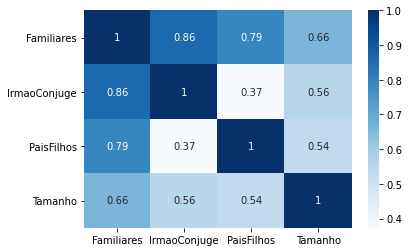

In [84]:
sns.heatmap(data[['Familiares','IrmaoConjuge','PaisFilhos','Tamanho']].corr(), annot=True, cmap='Blues')

In [85]:
sozinho = data['Familiares']==0

In [86]:
data['Sozinho'] = sozinho.map({True: 1, False: 0})

In [87]:
data.shape

(1309, 24)

In [88]:
train = data.loc[train.index]

In [89]:
train.shape

(891, 24)

In [90]:
test = data.loc[test.index]

In [91]:
test.shape

(418, 24)

In [92]:
test.drop('Sobreviveu', axis=1, inplace=True)

In [93]:
test.shape

(418, 23)

In [94]:
test.isnull().sum()

Tarifa                      0
PaisFilhos                  0
Sexo                        0
IrmaoConjuge                0
Tamanho                     0
SobrevivenciaGrupo          0
Classe_2                    0
Classe_3                    0
Embarque_Q                  0
Embarque_S                  0
Titulo_HomemAdulto          0
Titulo_Menino               0
Titulo_Outros               0
Titulo_Solteira             0
ExpectativaDeVida_morrer    0
ExpectativaDeVida_viver     0
Idade                       0
FaixaEtaria_(16.0, 32.0]    0
FaixaEtaria_(32.0, 48.0]    0
FaixaEtaria_(48.0, 64.0]    0
FaixaEtaria_(64.0, 80.0]    0
Familiares                  0
Sozinho                     0
dtype: int64

In [95]:
train.isnull().sum()

Tarifa                      0
PaisFilhos                  0
Sexo                        0
IrmaoConjuge                0
Sobreviveu                  0
Tamanho                     0
SobrevivenciaGrupo          0
Classe_2                    0
Classe_3                    0
Embarque_Q                  0
Embarque_S                  0
Titulo_HomemAdulto          0
Titulo_Menino               0
Titulo_Outros               0
Titulo_Solteira             0
ExpectativaDeVida_morrer    0
ExpectativaDeVida_viver     0
Idade                       0
FaixaEtaria_(16.0, 32.0]    0
FaixaEtaria_(32.0, 48.0]    0
FaixaEtaria_(48.0, 64.0]    0
FaixaEtaria_(64.0, 80.0]    0
Familiares                  0
Sozinho                     0
dtype: int64

In [96]:
X = train.drop('Sobreviveu', axis=1)

In [97]:
y = train['Sobreviveu']

In [98]:
X.shape

(891, 23)

In [99]:
y.shape

(891,)

In [100]:
X.columns

Index(['Tarifa', 'PaisFilhos', 'Sexo', 'IrmaoConjuge', 'Tamanho',
       'SobrevivenciaGrupo', 'Classe_2', 'Classe_3', 'Embarque_Q',
       'Embarque_S', 'Titulo_HomemAdulto', 'Titulo_Menino', 'Titulo_Outros',
       'Titulo_Solteira', 'ExpectativaDeVida_morrer',
       'ExpectativaDeVida_viver', 'Idade', 'FaixaEtaria_(16.0, 32.0]',
       'FaixaEtaria_(32.0, 48.0]', 'FaixaEtaria_(48.0, 64.0]',
       'FaixaEtaria_(64.0, 80.0]', 'Familiares', 'Sozinho'],
      dtype='object')

In [181]:
recursos = ['Tarifa', 'PaisFilhos', 'Sexo', 'IrmaoConjuge', 'Tamanho',
       'SobrevivenciaGrupo', 'Classe_2', 'Classe_3', 'Embarque_Q',
       'Embarque_S', 'Titulo_HomemAdulto', 'Titulo_Menino', 'Titulo_Outros',
       'Titulo_Solteira', 'ExpectativaDeVida_morrer',
       'ExpectativaDeVida_viver', 'Idade', 'Familiares', 'Sozinho']

In [182]:
X[recursos]

,Tarifa,PaisFilhos,Sexo,IrmaoConjuge,Tamanho,SobrevivenciaGrupo,Classe_2,Classe_3,Embarque_Q,Embarque_S,Titulo_HomemAdulto,Titulo_Menino,Titulo_Outros,Titulo_Solteira,ExpectativaDeVida_morrer,ExpectativaDeVida_viver,Idade,Familiares,Sozinho
PassengerId,,,,,,,,,,,,,,,,,,,
1,7.2500,0,0,1,0,0.0,0,1,0,1,1,0,0,0,0,0,22.000000,1,0
2,71.2833,0,1,1,1,1.0,0,0,0,0,0,0,0,0,0,0,38.000000,1,0
3,7.9250,0,1,0,1,1.0,0,1,0,1,0,0,0,1,0,0,26.000000,0,1
4,53.1000,0,1,1,1,1.0,0,0,0,1,0,0,0,0,0,0,35.000000,1,0
5,8.0500,0,0,0,0,0.0,0,1,0,1,1,0,0,0,0,0,35.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,13.0000,0,0,0,0,0.0,1,0,0,1,0,0,1,0,0,0,27.000000,0,1
888,30.0000,0,1,0,2,1.0,0,0,0,1,0,0,0,1,0,1,19.000000,0,1
889,23.4500,2,1,1,1,0.0,0,1,0,1,0,0,0,1,0,0,10.537041,3,0


In [185]:
from sklearn.model_selection import train_test_split

In [240]:
X_train, X_test, y_train, y_test = train_test_split(X[recursos], y, test_size=0.30, random_state=123)

In [241]:
from sklearn.ensemble import (AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, RandomForestClassifier)

In [242]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [243]:
class ModeloAuxiliar(object):
    def __init__(self,clf,seed=123,params=None):
        if params:
            params['random_state'] = seed
            self.clf = clf(**params)
        else:
            self.clf = clf()
        
    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        return self.clf.fit(x,y).feature_importances_
    
    def score(self,x,y):
        return self.clf.score(x,y)

In [244]:
modelos = [{'nome': 'logreg',
           'modelo': LogisticRegression},
          {'nome': 'etree',
           'modelo': ExtraTreesClassifier},
          {'nome': 'gradboost',
           'modelo': GradientBoostingClassifier},
          {'nome': 'adaboost',
           'modelo': AdaBoostClassifier},
          {'nome': 'SVC',
           'modelo': SVC},
          {'nome': 'KNN',
           'modelo': KNeighborsClassifier},
          {'nome': 'GaussianNB',
           'modelo': GaussianNB},
          {'nome': 'Perceptron',
           'modelo': Perceptron},
          {'nome': 'LinearSVC',
           'modelo': LinearSVC},
          {'nome': 'SGD',
           'modelo': SGDClassifier},
          {'nome': 'DTree',
           'modelo': DecisionTreeClassifier},
          {'nome': 'RForest',
           'modelo': RandomForestClassifier}]

In [245]:
resultados = []
for model in modelos:
    x = ModeloAuxiliar(clf=model['modelo'])
    #treinar o modelo
    x.fit(X_train, y_train)
    
    #gerar predição
    x_pred = x.predict(X_test)
    
    #gerar score
    acuracidade = round(x.score(X_test,y_test)*100,2)
    
    resultados.append({'nome': model['nome'],
                      'score': acuracidade,
                      'pred': x_pred})

C:\Users\jvfdi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jvfdi\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [246]:
resultados

[{'nome': 'logreg',
  'score': 90.3,
  'pred': array([1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
         0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
         0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
         0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
         0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
         0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
         1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
         0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0.,
         0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
         1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0.,
         0., 0., 0., 1., 0., 0.

In [247]:
novo_dataframe_resultados = pd.DataFrame(resultados)

In [248]:
novo_dataframe_resultados[['nome','score']].sort_values(by='score',ascending=False)

,nome,score
2,gradboost,91.42
0,logreg,90.30
3,adaboost,90.30
8,LinearSVC,87.31
11,RForest,85.82
6,GaussianNB,85.07
1,etree,83.58
10,DTree,82.09
5,KNN,75.37
4,SVC,72.76


In [249]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [250]:
kfold = KFold(n_splits=10, random_state=123, shuffle=True)

In [251]:
ada = AdaBoostClassifier(n_estimators=200, random_state=123, learning_rate=0.1)

In [252]:
resultado = cross_val_score(ada,X_train,y_train,cv=kfold,scoring='accuracy')

In [253]:
resultado.mean()

0.8891193036354327

In [254]:
resultado

array([0.93650794, 0.9047619 , 0.9047619 , 0.91935484, 0.90322581,
       0.90322581, 0.85483871, 0.91935484, 0.83870968, 0.80645161])

In [255]:
ada.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=200, random_state=123)

In [256]:
ada_pred = ada.predict(X_test)

In [257]:
ada_pred

array([1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0.

In [258]:
from sklearn.metrics import confusion_matrix

<AxesSubplot:>

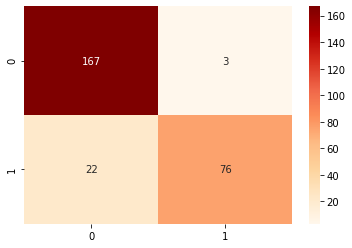

In [259]:
sns.heatmap(confusion_matrix(y_test, ada_pred), annot=True, cmap='OrRd', fmt='2.0f')

In [260]:
from sklearn.metrics import (recall_score,
                            accuracy_score,
                            precision_score,
                            f1_score)

In [261]:
recall_score(y_test, ada_pred)

0.7755102040816326

In [262]:
print(accuracy_score(y_test, ada_pred))
print(precision_score(y_test, ada_pred))
print(f1_score(y_test, ada_pred))

0.9067164179104478
0.9620253164556962
0.8587570621468926


In [263]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [264]:
ns_probs = [0 for _ in range(len(y_test))]
ada_probs = ada.predict_proba(X_test)

In [265]:
ada_probs = ada_probs[:,1]

In [266]:
ns_auc = roc_auc_score(y_test, ns_probs)

In [267]:
ada_auc = roc_auc_score(y_test, ada_probs)

In [268]:
print('Sem habilidade = %.3f' %(ns_auc))
print('ADA Boost = %.3f' %(ada_auc))

Sem habilidade = 0.500
ADA Boost = 0.934


In [269]:
ns_tfp, ns_tvp, _ = roc_curve(y_test, ns_probs)
ada_tfp, ada_tvp, _ = roc_curve(y_test, ada_probs)

Sem habilidade = 0.500
ADA Boost = 0.934


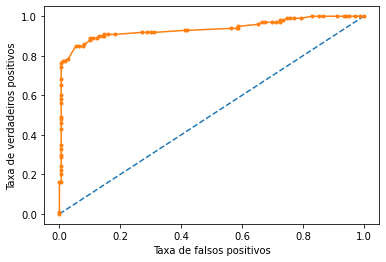

In [270]:
print('Sem habilidade = %.3f' %(ns_auc))
print('ADA Boost = %.3f' %(ada_auc))
plt.plot(ns_tfp, ns_tvp, linestyle='--', label='Sem Habilidade')
plt.plot(ada_tfp, ada_tvp, marker='.', label='ADA BOOST')
plt.xlabel('Taxa de falsos positivos')
plt.ylabel('Taxa de verdadeiros positivos')
plt.show()

In [271]:
pred_proba = ada_probs >= 0.5
pred_proba = pd.Series(pred_proba).map({False: 0, True: 1}).values

<AxesSubplot:>

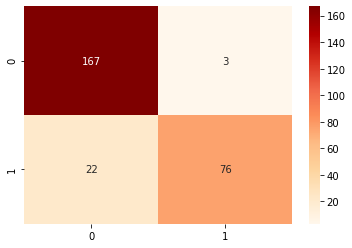

In [272]:
sns.heatmap(confusion_matrix(y_test, pred_proba), cmap='OrRd', annot=True, fmt='2.0f')

In [273]:
from sklearn.model_selection import GridSearchCV

In [274]:
rf_params = {'n_estimators': [100,200],
            'max_depth': [2,4],
            'min_samples_leaf': [1,2,3]}

gd = GridSearchCV(estimator=RandomForestClassifier(random_state=123), param_grid=rf_params, verbose=1)
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)
print(gd.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
0.8908903225806452
RandomForestClassifier(max_depth=4, random_state=123)
{'max_depth': 4, 'min_samples_leaf': 1, 'n_estimators': 100}


In [275]:
misturados = [('KNN',KNeighborsClassifier(n_neighbors=10)),
                  ('RBF',SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                  ('RFor',RandomForestClassifier(n_estimators=100,random_state=123)),
                  ('LR',LogisticRegression(C=0.05)),
                  ('DT',DecisionTreeClassifier(random_state=123)),
                  ('NB',GaussianNB()),
                  ('svm',SVC(kernel='linear',probability=True))
                 ]

In [276]:
from sklearn.ensemble import VotingClassifier

meu_ensemble = VotingClassifier(estimators=misturados, voting='soft').fit(X_train, y_train)

print('Score', meu_ensemble.score(X_test, y_test))
cross = cross_val_score(meu_ensemble, X_test, y_test, cv=10, scoring='accuracy')
print('Score cross-validado', cross)

C:\Users\jvfdi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Score 0.8917910447761194


C:\Users\jvfdi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jvfdi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Score cross-validado [0.96296296 0.96296296 0.77777778 0.88888889 0.92592593 0.96296296
 0.85185185 0.74074074 0.92307692 0.88461538]


In [277]:
cross.mean()

0.8881766381766383

In [278]:
from sklearn.ensemble import BaggingClassifier

In [279]:
knn = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3), random_state=123, n_estimators=100)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

print('Score', knn.score(X_test, y_test))
cross = cross_val_score(knn, X_test, y_test, cv=10, scoring='accuracy')
print('Score cross-validado', cross.mean())

Score 0.7350746268656716
Score cross-validado 0.72008547008547


In [280]:
dtree = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=123, n_estimators=100)
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)

print('Score', dtree.score(X_test, y_test))
cross = cross_val_score(dtree, X_test, y_test, cv=10, scoring='accuracy')
print('Score cross-validado', cross.mean())

Score 0.8880597014925373
Score cross-validado 0.8773504273504275


In [281]:
grad = GradientBoostingClassifier(n_estimators=100, random_state=123, learning_rate=0.1)
grad.fit(X_train, y_train)
grad_pred = grad.predict(X_test)

print('Score', grad.score(X_test, y_test))
cross = cross_val_score(grad, X_test, y_test, cv=10, scoring='accuracy')
print('Score cross-validado', cross.mean())

Score 0.914179104477612
Score cross-validado 0.8625356125356125


In [282]:
n_estimator = [100,200]
learn_rate = [0.05,0.1,0.3]
hyper={'n_estimators': n_estimator, 'learning_rate': learn_rate}
gd = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=hyper, verbose=True)
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)
print(gd.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
0.8909032258064518
AdaBoostClassifier(learning_rate=0.05, n_estimators=200)
{'learning_rate': 0.05, 'n_estimators': 200}


In [283]:
adaboostpred = gd.predict(X_test)

In [284]:
rf_params = {'n_jobs': -1,
            'n_estimators': 100,
            'max_depth': 2,
            'min_samples_leaf': 2,
            'verbose': 0}

In [285]:
rf = ModeloAuxiliar(clf=RandomForestClassifier, seed=123, params=rf_params)

In [286]:
rf_feature = rf.feature_importances(X_train, y_train)

In [287]:
rf_feature

array([2.16556835e-02, 2.00897379e-03, 1.49283788e-01, 6.13596830e-03,
       1.56899723e-01, 3.33640848e-01, 1.84207771e-03, 3.72985700e-02,
       6.84458991e-05, 9.74875454e-04, 1.14219504e-01, 1.94428587e-03,
       1.23046542e-03, 4.71116780e-02, 1.60025168e-02, 8.62110599e-02,
       1.30131273e-02, 6.44792772e-03, 4.01048100e-03])

In [288]:
cols = X_train.columns.values
cols

array(['Tarifa', 'PaisFilhos', 'Sexo', 'IrmaoConjuge', 'Tamanho',
       'SobrevivenciaGrupo', 'Classe_2', 'Classe_3', 'Embarque_Q',
       'Embarque_S', 'Titulo_HomemAdulto', 'Titulo_Menino',
       'Titulo_Outros', 'Titulo_Solteira', 'ExpectativaDeVida_morrer',
       'ExpectativaDeVida_viver', 'Idade', 'Familiares', 'Sozinho'],
      dtype=object)

In [289]:
feature_df = pd.DataFrame({'recursos': cols, 'Importancia recursos RForest': rf_feature})

In [290]:
feature_df

,recursos,Importancia recursos RForest
0,Tarifa,0.021656
1,PaisFilhos,0.002009
2,Sexo,0.149284
3,IrmaoConjuge,0.006136
4,Tamanho,0.156900
5,SobrevivenciaGrupo,0.333641
6,Classe_2,0.001842
7,Classe_3,0.037299
8,Embarque_Q,0.000068
9,Embarque_S,0.000975


<AxesSubplot:ylabel='recursos'>

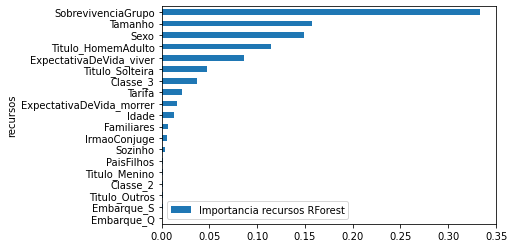

In [291]:
feature_df.sort_values(by='Importancia recursos RForest').plot.barh(x='recursos')

In [293]:
meu_ensemble.fit(X_train, y_train)

C:\Users\jvfdi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=10)),
                             ('RBF', SVC(C=0.5, gamma=0.1, probability=True)),
                             ('RFor', RandomForestClassifier(random_state=123)),
                             ('LR', LogisticRegression(C=0.05)),
                             ('DT', DecisionTreeClassifier(random_state=123)),
                             ('NB', GaussianNB()),
                             ('svm', SVC(kernel='linear', probability=True))],
                 voting='soft')

In [294]:
meu_ensemble.score(X_test, y_test)

0.8917910447761194

In [297]:
test[recursos].shape

(418, 19)

In [296]:
X_test.shape

(268, 19)

In [298]:
ensemble_pred = meu_ensemble.predict(test[recursos])

In [300]:
ensemble_pred.shape

(418,)

In [301]:
test.index

Int64Index([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,
            ...
            1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309],
           dtype='int64', name='PassengerId', length=418)

In [302]:
submissao = pd.DataFrame({'PassengerID': test.index,
                         'Survived': ensemble_pred})

In [305]:
submissao['Survived'] = submissao['Survived'].astype('int')

In [306]:
submissao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerID  418 non-null    int64
 1   Survived     418 non-null    int32
dtypes: int32(1), int64(1)
memory usage: 5.0 KB


In [307]:
submissao.to_csv('predicoes.csv', index=False)